
=== Evaluation ===
Accuracy: 0.9695

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.97      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



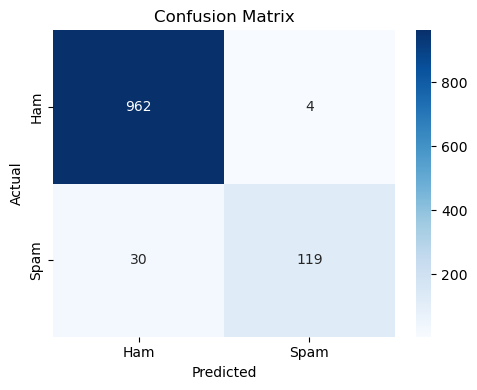


Enter a message to check if it's spam or not:  URGENT! Your account has been compromised. Verify details now!



Prediction: ✅ Not Spam



Check another message? (yes/no):  yes

Enter a message to check if it's spam or not:  You have won a free vacation to the Bahamas! Click to claim your prize.



Prediction: 📩 Spam



Check another message? (yes/no):  no


Exiting the Spam Detector. Have a chill day! 😎


In [6]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "spam.csv"
data = pd.read_csv(file_path, encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
data["clean_message"] = data["message"].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=7000)
X = vectorizer.fit_transform(data["clean_message"])

# Normalize
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Labels
y = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Train KNN with cosine distance
knn_model = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn_model.fit(X_train, y_train)

# Predict
y_pred = knn_model.predict(X_test)

# Evaluation
print("\n=== Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Real-time prediction
def predict_message():
    user_input = input("\nEnter a message to check if it's spam or not: ")
    cleaned = clean_text(user_input)
    vectorized = vectorizer.transform([cleaned])
    normalized = normalizer.transform(vectorized)
    prediction = knn_model.predict(normalized)[0]
    print("\nPrediction:", "📩 Spam" if prediction == 1 else "✅ Not Spam")

# Run interactive session
while True:
    predict_message()
    again = input("\nCheck another message? (yes/no): ").strip().lower()
    if again != 'yes':
        print("Exiting the Spam Detector. Have a chill day! 😎")
        break
